In [1]:
import pandas as pd
from builder import build_dataset
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

start = pd.Timestamp("2014-12-15 10:00:00+01:00")
end = pd.Timestamp("2025-11-05", tz="CET")
# df = build_dataset(start, end)
# df.to_csv("backup.csv")

df = pd.read_csv("backup.csv", index_col=0, parse_dates=True)
df = df.asfreq('h')
df

,day_sin,day_cos,month_sin,month_cos,dow_sin,dow_cos,is_weekend,hour_sin,hour_cos,load,temp
2014-12-15 10:00:00+01:00,0.101168,-0.994869,-2.449294e-16,1.000000,0.000000,1.00000,0,7.071068e-01,-7.071068e-01,72729.00,7.13
2014-12-15 11:00:00+01:00,0.101168,-0.994869,-2.449294e-16,1.000000,0.000000,1.00000,0,5.000000e-01,-8.660254e-01,73107.00,7.94
2014-12-15 12:00:00+01:00,0.101168,-0.994869,-2.449294e-16,1.000000,0.000000,1.00000,0,2.588190e-01,-9.659258e-01,73077.00,8.62
2014-12-15 13:00:00+01:00,0.101168,-0.994869,-2.449294e-16,1.000000,0.000000,1.00000,0,1.224647e-16,-1.000000e+00,71859.00,9.17
2014-12-15 14:00:00+01:00,0.101168,-0.994869,-2.449294e-16,1.000000,0.000000,1.00000,0,-2.588190e-01,-9.659258e-01,70910.00,9.68
...,...,...,...,...,...,...,...,...,...,...,...
2025-11-04 19:00:00+01:00,0.724793,0.688967,-5.000000e-01,0.866025,0.781831,0.62349,0,-1.000000e+00,-1.836970e-16,55355.50,14.53
2025-11-04 20:00:00+01:00,0.724793,0.688967,-5.000000e-01,0.866025,0.781831,0.62349,0,-9.659258e-01,2.588190e-01,52126.75,13.81
2025-11-04 21:00:00+01:00,0.724793,0.688967,-5.000000e-01,0.866025,0.781831,0.62349,0,-8.660254e-01,5.000000e-01,49397.00,13.33
2025-11-04 22:00:00+01:00,0.724793,0.688967,-5.000000e-01,0.866025,0.781831,0.62349,0,-7.071068e-01,7.071068e-01,49807.75,13.05


# Describe

<Axes: >

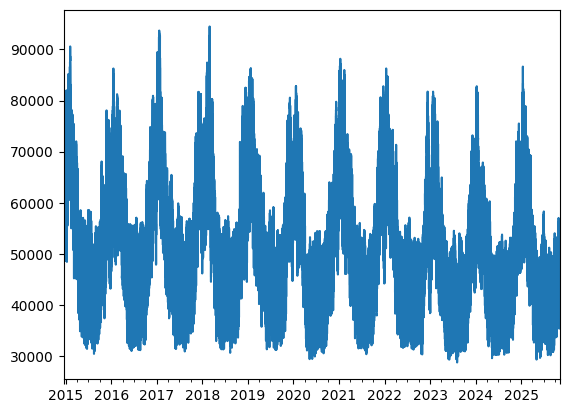

In [3]:
df.load.plot()

Le processus stochastique semble stationnaire (au sens faible)

<Axes: ylabel='Density'>

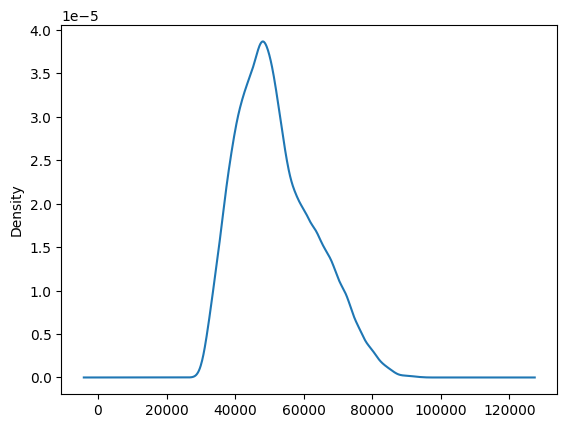

In [4]:
# distribution function
df.load.plot(kind='kde')

<Axes: >

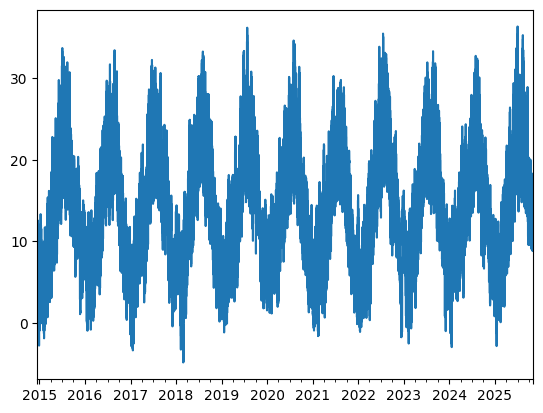

In [5]:
df.temp.plot()

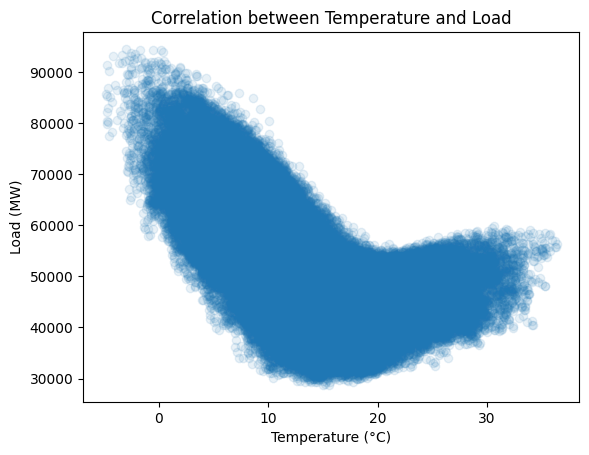

In [6]:
# plot correlation between load and temp
plt.scatter(df.temp, df.load, alpha=0.1)
plt.xlabel("Temperature (°C)")
plt.ylabel("Load (MW)")
plt.title("Correlation between Temperature and Load")
plt.show()

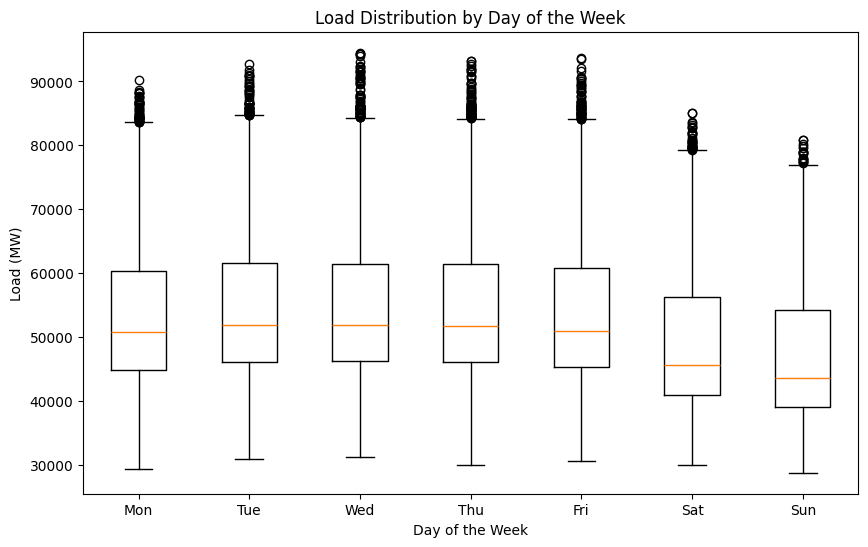

In [7]:
# Correlation between day of week and load
dow = df.dropna().index.dayofweek
plt.figure(figsize=(10, 6))
plt.boxplot([df.dropna()[dow == i]['load'] for i in range(7)],
            tick_labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of the Week")
plt.ylabel("Load (MW)")
plt.title("Load Distribution by Day of the Week")
plt.show()

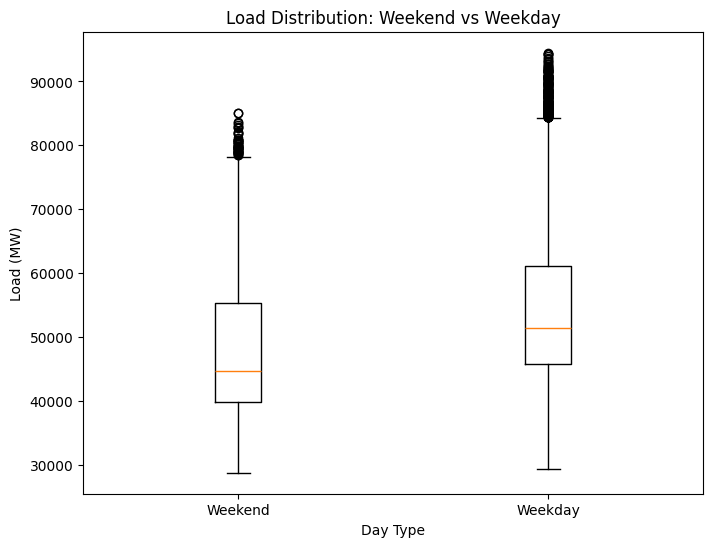

In [8]:
# Correlation between load and is_weekend
is_weekend = df.dropna().is_weekend == 1
plt.figure(figsize=(8, 6))
plt.boxplot([df.dropna()[is_weekend]['load'], df.dropna()[~is_weekend]['load']],
            tick_labels=['Weekend', 'Weekday'])
plt.xlabel("Day Type")
plt.ylabel("Load (MW)")
plt.title("Load Distribution: Weekend vs Weekday")
plt.show()

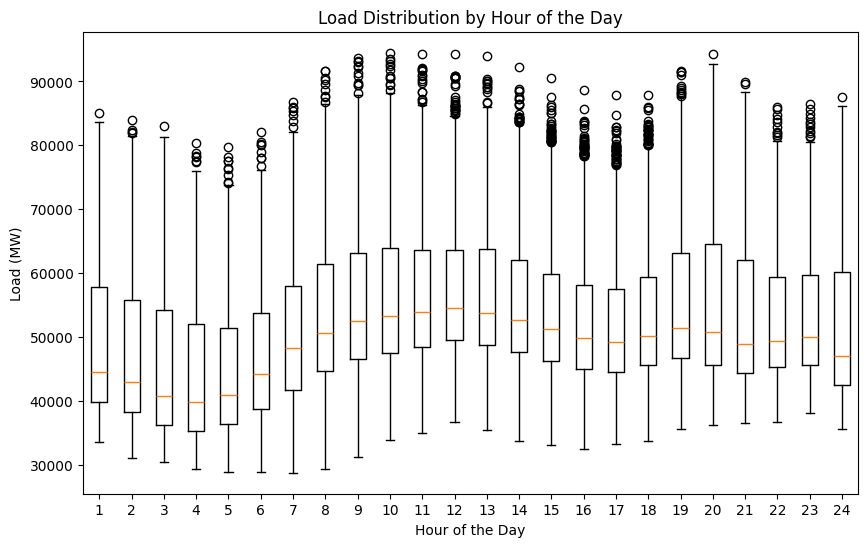

In [9]:
# Correlation between day of week and load
day = df.dropna().index.hour
plt.figure(figsize=(10, 6))
plt.boxplot([df.dropna()[day == i]['load'] for i in range(24)])
plt.xlabel("Hour of the Day")
plt.ylabel("Load (MW)")
plt.title("Load Distribution by Hour of the Day")
plt.show()

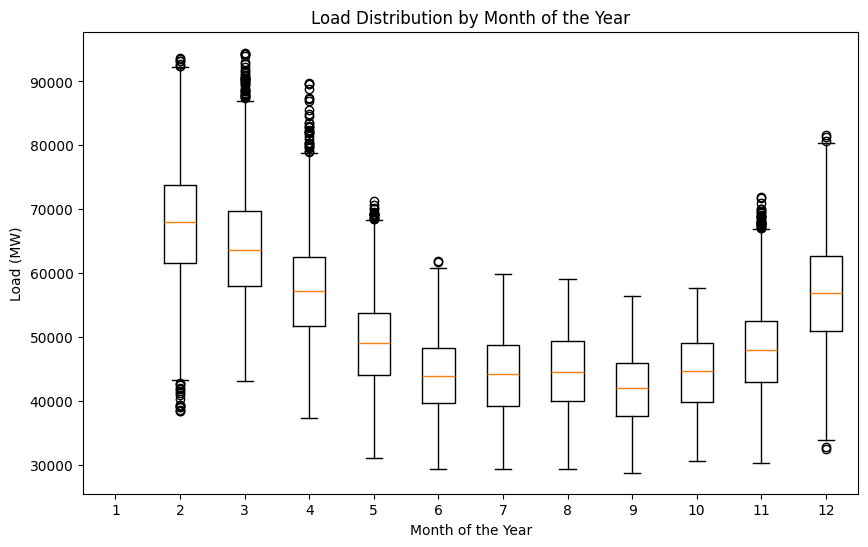

In [10]:
# Correlation between day of week and load
month = df.dropna().index.month
plt.figure(figsize=(10, 6))
plt.boxplot([df.dropna()[month == i]['load'] for i in range(12)])
plt.xlabel("Month of the Year")
plt.ylabel("Load (MW)")
plt.title("Load Distribution by Month of the Year")
plt.show()

# Missing values

In [11]:
# Count missing values
missing_load = df.load.isna().sum()
print(f"Number of missing values in 'load': {missing_load}")
missing_temp = df.temp.isna().sum()
print(f"Number of missing values in 'temp': {missing_temp}")

Number of missing values in 'load': 99
Number of missing values in 'temp': 0


In [12]:
# Where are the missing load values?
missing_load_indices = df[df.load.isna()].index
print("Missing load values at:")
for idx in missing_load_indices:
    print(idx)

Missing load values at:
2015-05-12 16:00:00+01:00
2015-12-15 10:00:00+01:00
2016-01-31 02:00:00+01:00
2016-08-01 11:00:00+01:00
2016-08-01 12:00:00+01:00
2016-09-19 11:00:00+01:00
2016-10-30 00:00:00+01:00
2016-10-30 01:00:00+01:00
2016-12-15 10:00:00+01:00
2017-02-05 20:00:00+01:00
2017-02-05 21:00:00+01:00
2017-02-05 22:00:00+01:00
2017-02-05 23:00:00+01:00
2017-02-06 00:00:00+01:00
2017-02-06 01:00:00+01:00
2017-02-06 02:00:00+01:00
2017-02-06 03:00:00+01:00
2017-02-06 04:00:00+01:00
2017-02-06 05:00:00+01:00
2017-02-06 06:00:00+01:00
2017-02-06 07:00:00+01:00
2017-02-06 08:00:00+01:00
2017-03-30 03:00:00+01:00
2017-03-30 04:00:00+01:00
2017-10-03 16:00:00+01:00
2017-10-03 17:00:00+01:00
2017-10-29 01:00:00+01:00
2017-11-17 15:00:00+01:00
2017-12-15 10:00:00+01:00
2018-04-26 09:00:00+01:00
2018-06-13 08:00:00+01:00
2018-08-12 08:00:00+01:00
2018-08-12 09:00:00+01:00
2018-08-12 10:00:00+01:00
2018-08-12 11:00:00+01:00
2018-08-12 12:00:00+01:00
2018-10-04 02:00:00+01:00
2018-10-04 03:

In [13]:
# Since thre are only few missing values (no big gap), we can use simple imputation methods such as forward fill.
df["load"] = df["load"].ffill()

# missing values over the whole dataframe
total_missing = df.isna().sum()
print(f"Total missing values after imputation: {total_missing}")

Total missing values after imputation: day_sin       0
day_cos       0
month_sin     0
month_cos     0
dow_sin       0
dow_cos       0
is_weekend    0
hour_sin      0
hour_cos      0
load          0
temp          0
dtype: int64


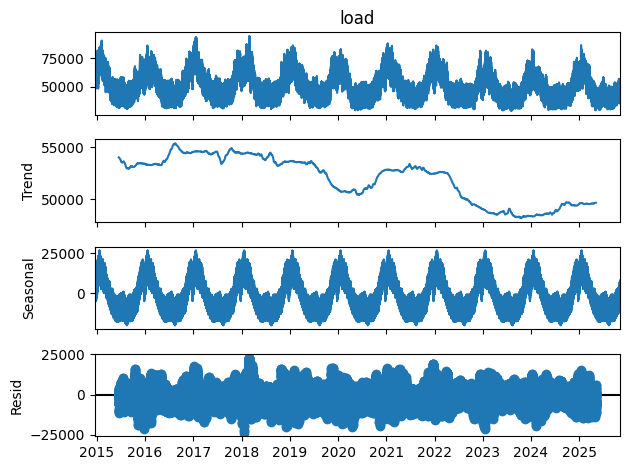

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.load, model='additive', period=24*365)
result.plot()
plt.show()

# Dummy forecast $y_t = y_{t-24}$

In [15]:
from sklearn.metrics import mean_absolute_error

x = df.load

y_naive = x.shift(24).dropna()
y_true = x.loc[y_naive.index]
mae_naive = mean_absolute_error(y_true, y_naive)
print(f"Naive MAE: {mae_naive:.2f} MW")

Naive MAE: 2851.37 MW


# Train test set

Train:	 81470
Test:	 13993
Naive MAE on Test Set: 2504.89 MW


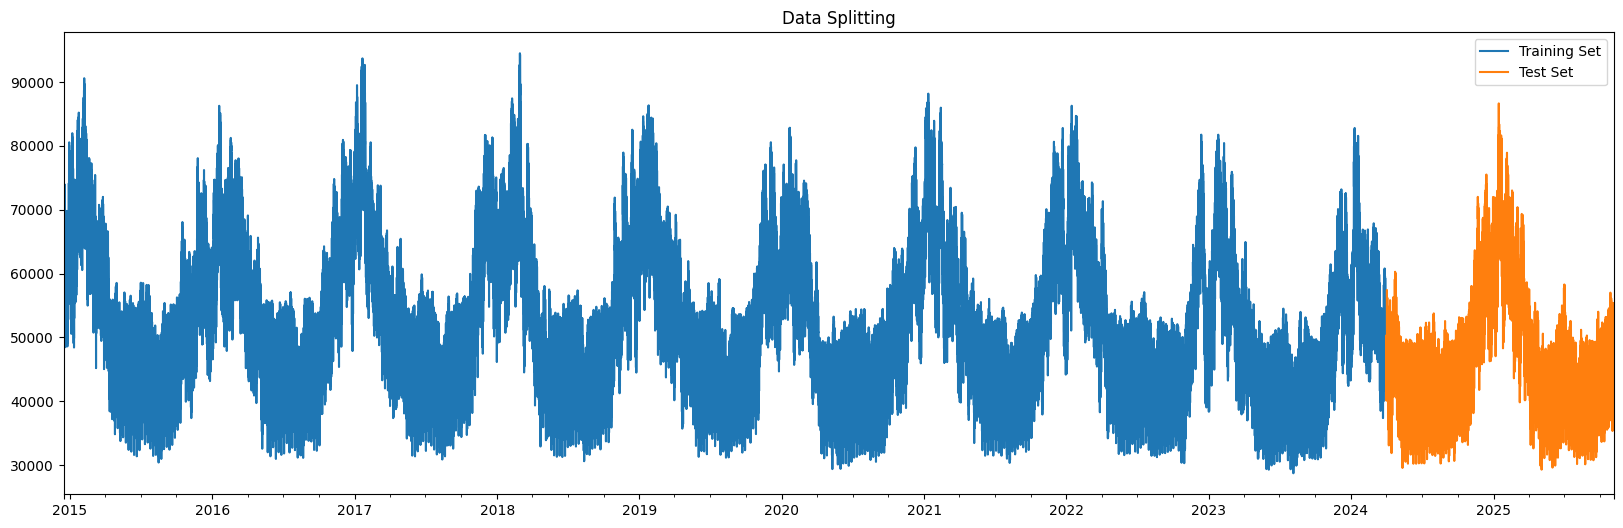

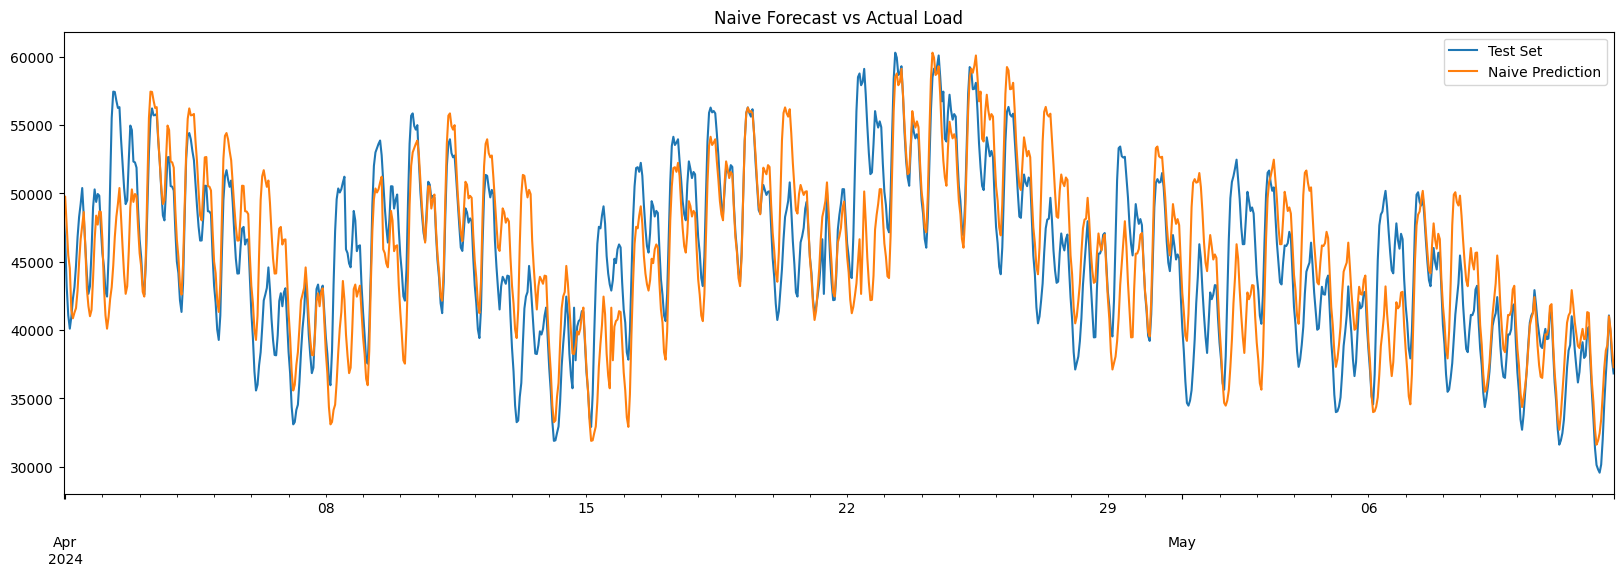

In [16]:
cutoff_date = pd.Timestamp("2024-04-01", tz="CET")
train, test = df[:cutoff_date], df[cutoff_date:]

print('Train:\t', len(train))
print('Test:\t', len(test))

plt.figure(figsize=(20,6))

train.load.plot(label='Training Set')
test.load.plot(label='Test Set')
plt.axvline('2010-05-01', color='black', ls='--', lw=3)
plt.title('Data Splitting')
plt.legend()

mae_naive = mean_absolute_error(test.load, y_naive.loc[test.index])
print(f"Naive MAE on Test Set: {mae_naive:.2f} MW")

hours=1000
plt.figure(figsize=(20,6))
test.load.iloc[:hours].plot(label='Test Set')
y_naive.loc[test.index].iloc[:hours].plot(label='Naive Prediction')
plt.title('Naive Forecast vs Actual Load')
plt.legend()
plt.show()

Naive Day-Ahead MAE: 1745.29 MW


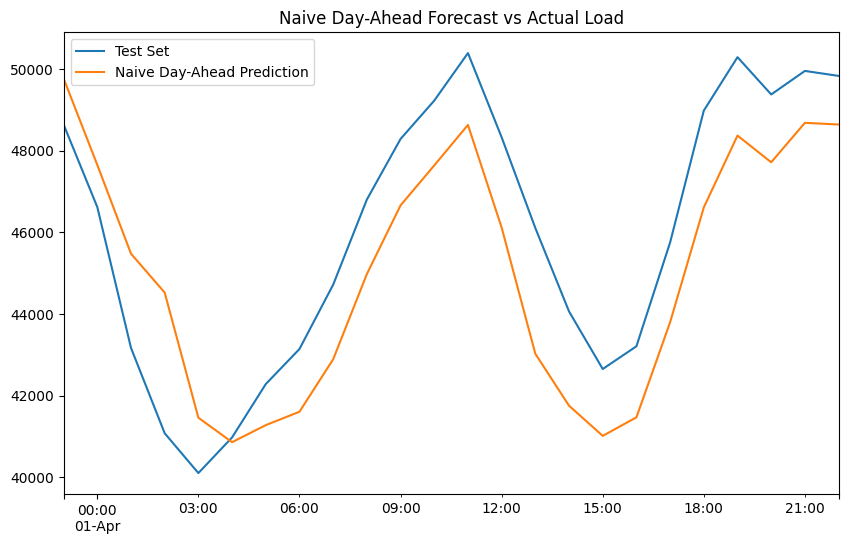

In [17]:
# next day prediction
pred_naive_day_ahead = train.load[-24:]
test_day_ahead = test.load[:24]
pred_naive_day_ahead.index = test_day_ahead.index
mae_naive_day_ahead = mean_absolute_error(test_day_ahead, pred_naive_day_ahead)
print(f"Naive Day-Ahead MAE: {mae_naive_day_ahead:.2f} MW")

# plot next day prediction
plt.figure(figsize=(10,6))
test_day_ahead.plot(label='Test Set')
pred_naive_day_ahead.plot(label='Naive Day-Ahead Prediction')
plt.title('Naive Day-Ahead Forecast vs Actual Load')
plt.legend()
plt.show()

# Exponential Smoothing

\begin{align*}
y_t &= \ell_{t-1} + s_{t-m} + \varepsilon_t \\
\ell_t &= \ell_{t-1} + \alpha \varepsilon_t \\
s_t &= s_{t-m} + \gamma \varepsilon_t
\end{align*}
$$
m = \text{period of seasonality}
$$


In [18]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/opt/miniconda3/envs/epf/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing MAE: 3441.96 MW
Model parameters:
smoothing level: 1.0
smoothing seasonal: 0.0


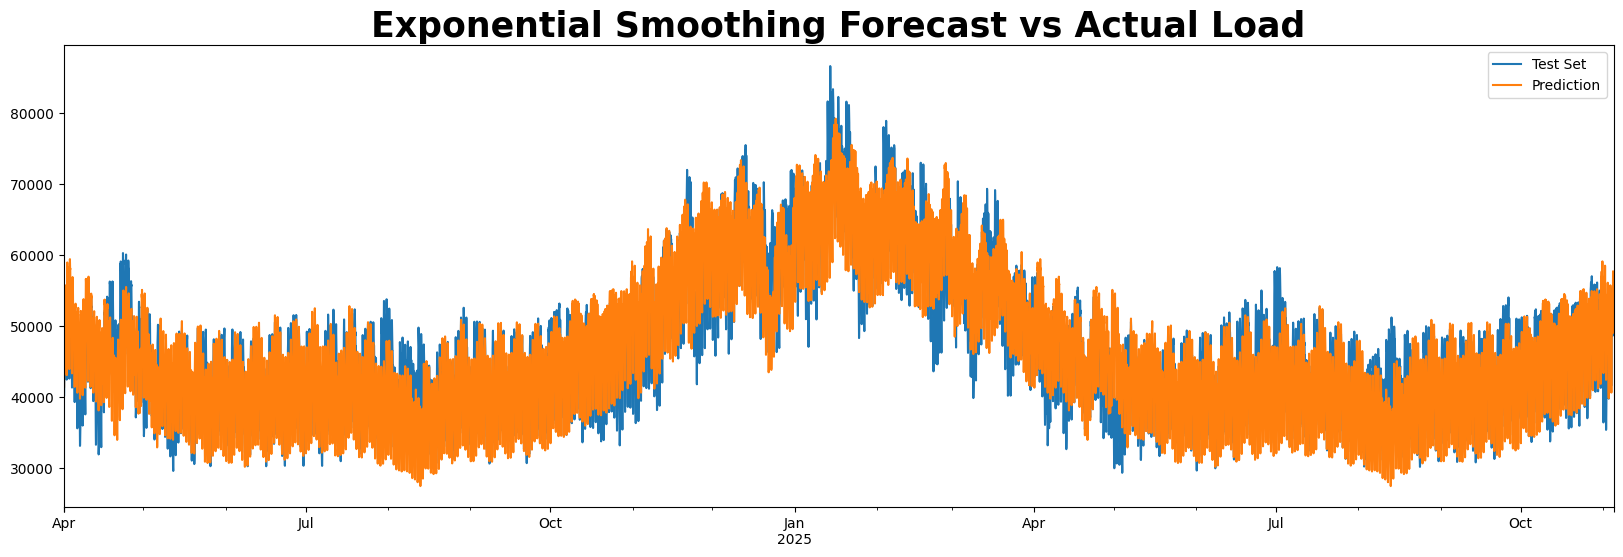

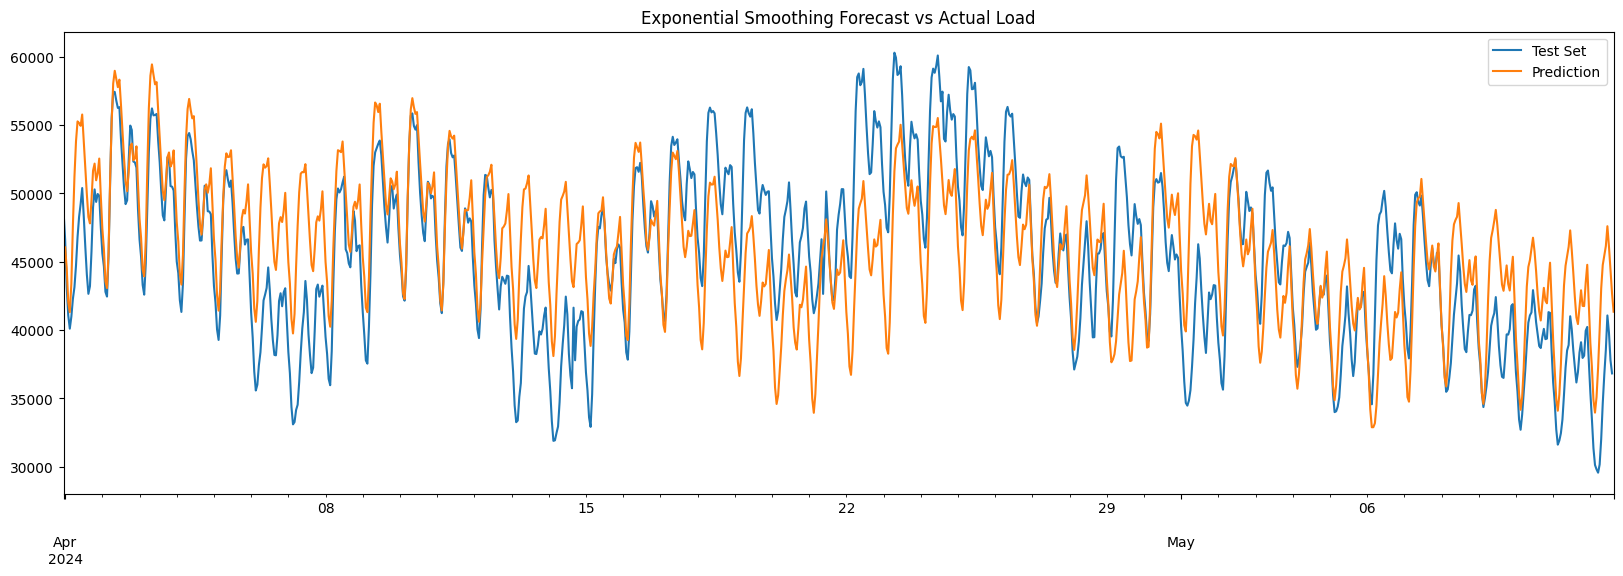

In [22]:
conv = 1e6  # conversion factor 
x_train = train.load/conv

model = ExponentialSmoothing(x_train, seasonal="add", seasonal_periods=365*24).fit()
pred = model.forecast(len(test))*conv
mae_exp_smooth = mean_absolute_error(test.load, pred)
print(f"Exponential Smoothing MAE: {mae_exp_smooth:.2f} MW")
# print important model parameters
print("Model parameters:")
print(f"smoothing level: {round(model.params['smoothing_level'], 2)}")
print(f"smoothing seasonal: {round(model.params['smoothing_seasonal'],2)}")

plt.figure(figsize=(20,6))
test.load.plot(label='Test Set')
pred.plot(label='Prediction')
plt.title('Exponential Smoothing Forecast vs Actual Load', weight='bold', fontsize=25)
plt.legend()
plt.show()

hours=1000
plt.figure(figsize=(20,6))
test.load.iloc[:hours].plot(label='Test Set')
pred.iloc[:hours].plot(label='Prediction')
plt.title('Exponential Smoothing Forecast vs Actual Load')
plt.legend()
plt.show()

/opt/miniconda3/envs/epf/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Exponential Smoothing MAE: 3373.54 MW
Model parameters:
smoothing level: 0.9
smoothing seasonal: 0.5
Exponential Smoothing Day-Ahead MAE: 4552.50 MW


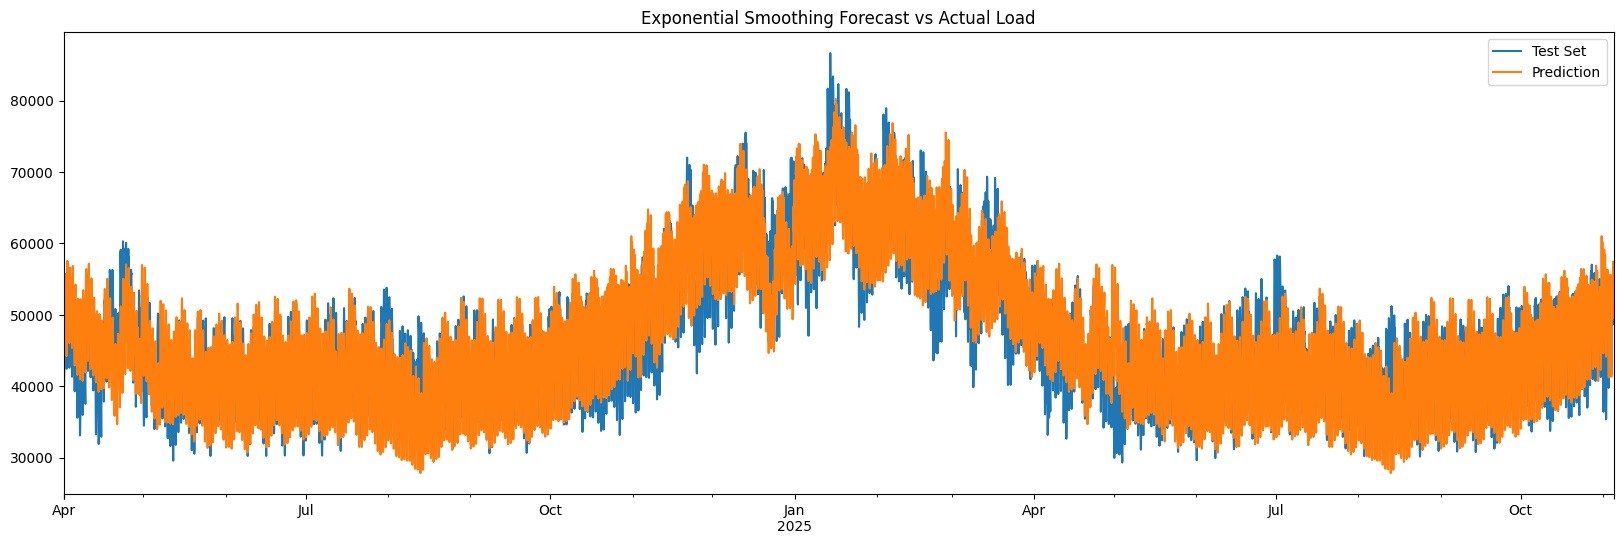

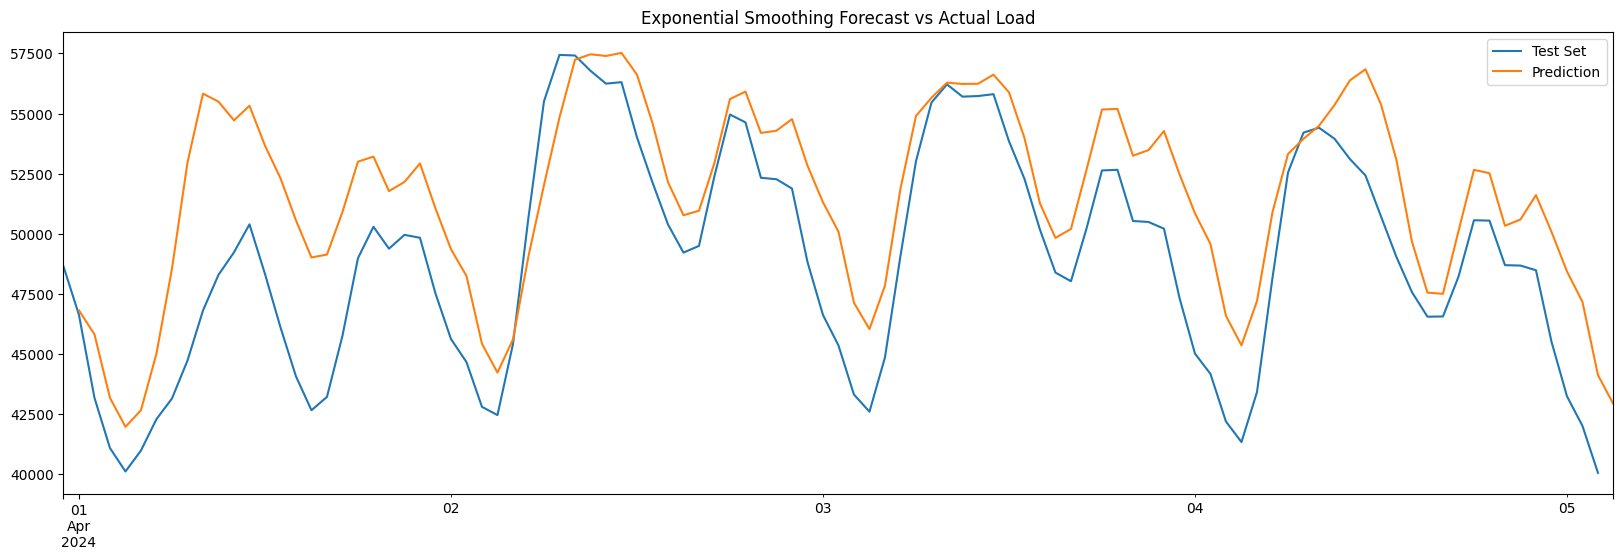

In [24]:
conv = 1e6  # conversion factor 
x_train = train.load/conv

alpha = 0.9
gamma = 0.5

model = ExponentialSmoothing(x_train, seasonal="add", seasonal_periods=365*24).fit(smoothing_level=alpha, smoothing_seasonal=gamma)
pred = model.forecast(len(test))*conv
mae_exp_smooth = mean_absolute_error(test.load, pred)
print(f"Exponential Smoothing MAE: {mae_exp_smooth:.2f} MW")
# print important model parameters
print("Model parameters:")
print(f"smoothing level: {round(model.params['smoothing_level'],2)}")
print(f"smoothing seasonal: {round(model.params['smoothing_seasonal'],2)}")

# day ahead prediction
pred_day_ahead = model.forecast(24)*conv
test_day_ahead = test.load[:24]
mae_exp_smooth_day_ahead = mean_absolute_error(test_day_ahead, pred_day_ahead)
print(f"Exponential Smoothing Day-Ahead MAE: {mae_exp_smooth_day_ahead:.2f} MW")

plt.figure(figsize=(20,6))
test.load.plot(label='Test Set')
pred.plot(label='Prediction')
plt.title('Exponential Smoothing Forecast vs Actual Load')
plt.legend()
plt.show()

hours=100
plt.figure(figsize=(20,6))
test.load.iloc[:hours].plot(label='Test Set')
pred.iloc[:hours].plot(label='Prediction')
plt.title('Exponential Smoothing Forecast vs Actual Load')
plt.legend()
plt.show()


This model is too simple to model the many seasonalities in the load

# We need to check the stationnarity of the serie
## (S)ARIMA(X) models
use Augmented Dickey-Fuller (ADF) test

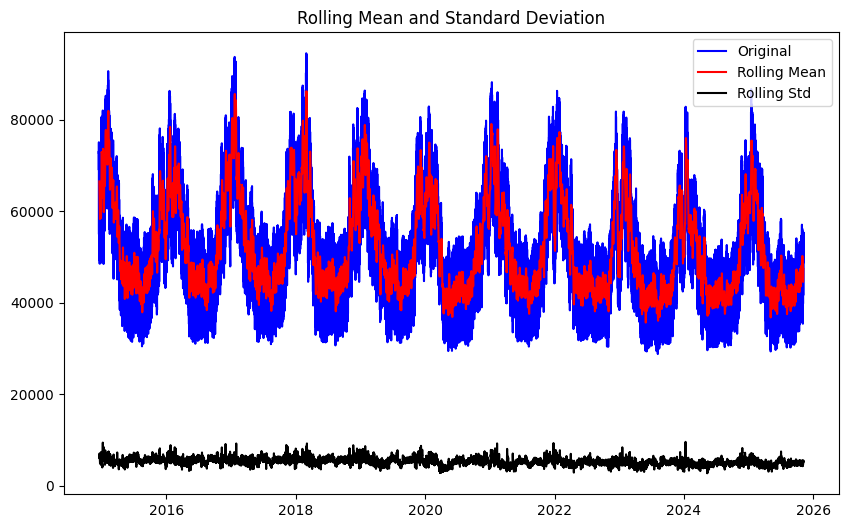

Results of dickey fuller test
Test Statistics               -7.814825e+00
p-value                        6.914806e-12
No. of lags used               6.700000e+01
Number of observations used    9.539400e+04
critical value (1%)           -3.430419e+00
critical value (5%)           -2.861570e+00
critical value (10%)          -2.566786e+00
dtype: float64


In [25]:
from statsmodels.tsa.stattools import adfuller
lag = 24*3 
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(lag).mean()
    rolstd = timeseries.rolling(lag).std()
    #Plot rolling statistics:
    plt.figure(figsize=(10,6))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries ,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(df.load)

Since we want to predict a day ahead the serie cannot be considered stationary.
Let's try to differanciate to make it stationary

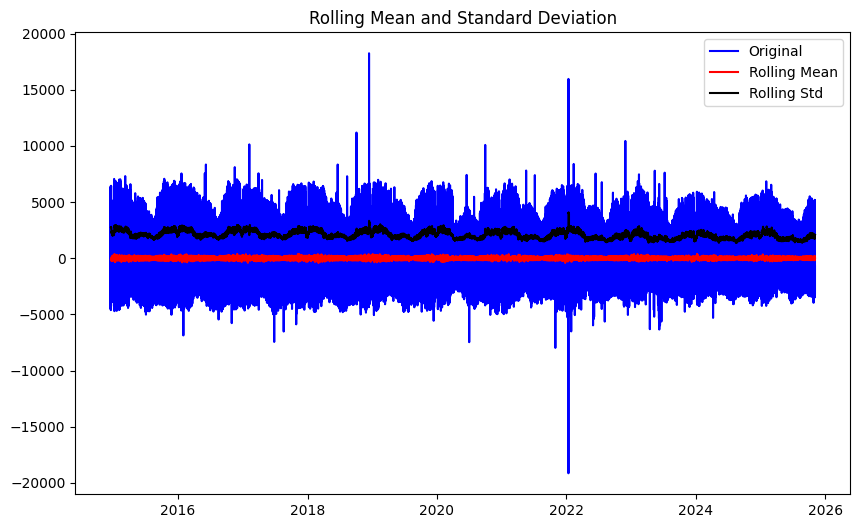

Results of dickey fuller test
Test Statistics                  -59.298923
p-value                            0.000000
No. of lags used                  67.000000
Number of observations used    95393.000000
critical value (1%)               -3.430419
critical value (5%)               -2.861570
critical value (10%)              -2.566786
dtype: float64


In [26]:
test_stationarity(df.load.diff().dropna())

d=1 is appropriate for modeling, now we need to model the strong seasonality of our model -> ADF test with 24 hours differenciating

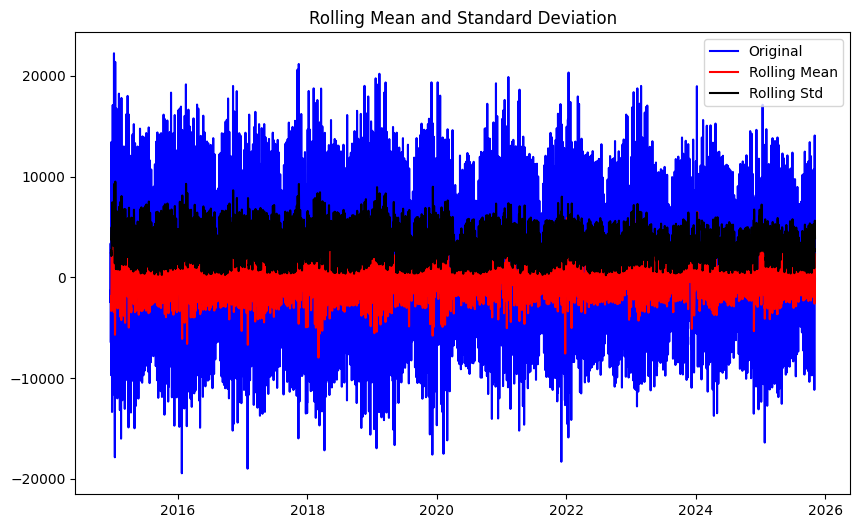

Results of dickey fuller test
Test Statistics                  -44.754755
p-value                            0.000000
No. of lags used                  67.000000
Number of observations used    95370.000000
critical value (1%)               -3.430419
critical value (5%)               -2.861570
critical value (10%)              -2.566786
dtype: float64


In [27]:
test_stationarity(df.load.diff(24).dropna())

# p,q parameters

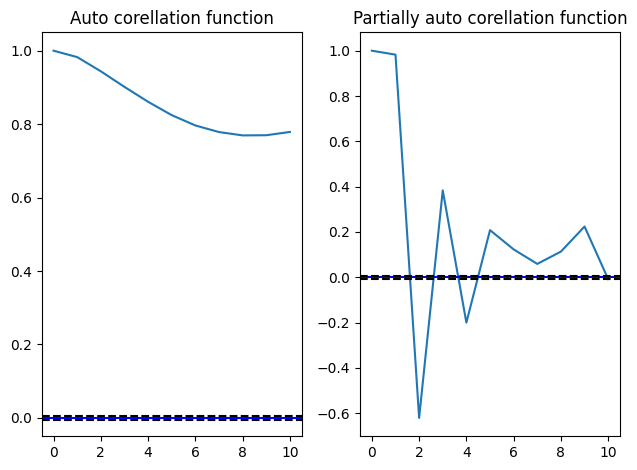

In [28]:
from statsmodels.tsa.stattools import acf,pacf
ts = df.load
acf = acf(ts, nlags=10)
pacf= pacf(ts, nlags=10)
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

p=2, q=0

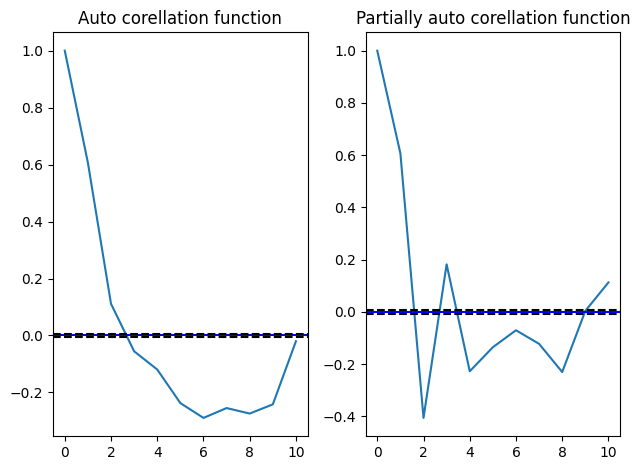

In [29]:
from statsmodels.tsa.stattools import acf,pacf
ts = df.load.diff().dropna()
acf = acf(ts, nlags=10)
pacf= pacf(ts, nlags=10)
plt.subplot(121)
plt.plot(acf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Auto corellation function')
plt.tight_layout()#plot ACF
plt.subplot(122)
plt.plot(pacf) 
plt.axhline(y=0,linestyle='-',color='blue')
plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='black')
plt.title('Partially auto corellation function')
plt.tight_layout()

Fitting SARIMAX(3, 0, 0)x(3, 0, 0, 24) model...
                                     SARIMAX Results                                      
Dep. Variable:                               load   No. Observations:                 8760
Model:             SARIMAX(3, 0, 0)x(3, 0, 0, 24)   Log Likelihood               49325.487
Date:                            Fri, 07 Nov 2025   AIC                         -98636.975
Time:                                    11:17:21   BIC                         -98587.429
Sample:                                04-02-2023   HQIC                        -98620.093
                                     - 03-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8370      0.006    290.413      0.000       1.825

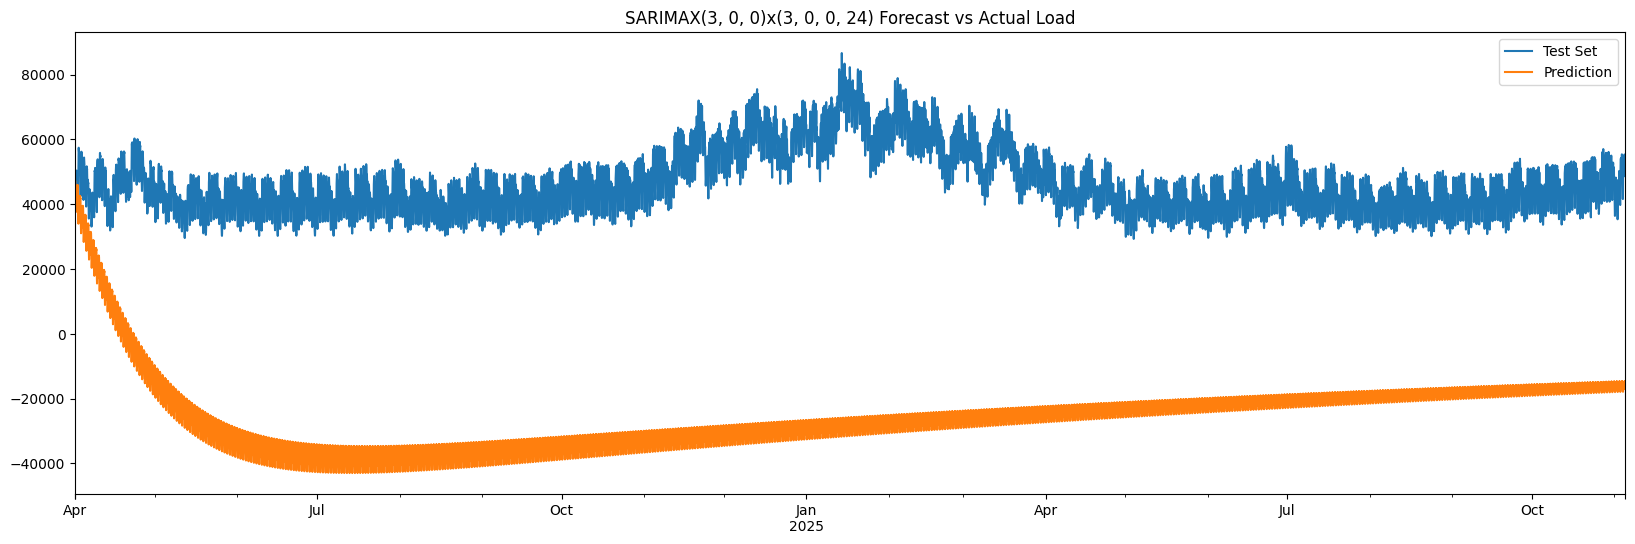

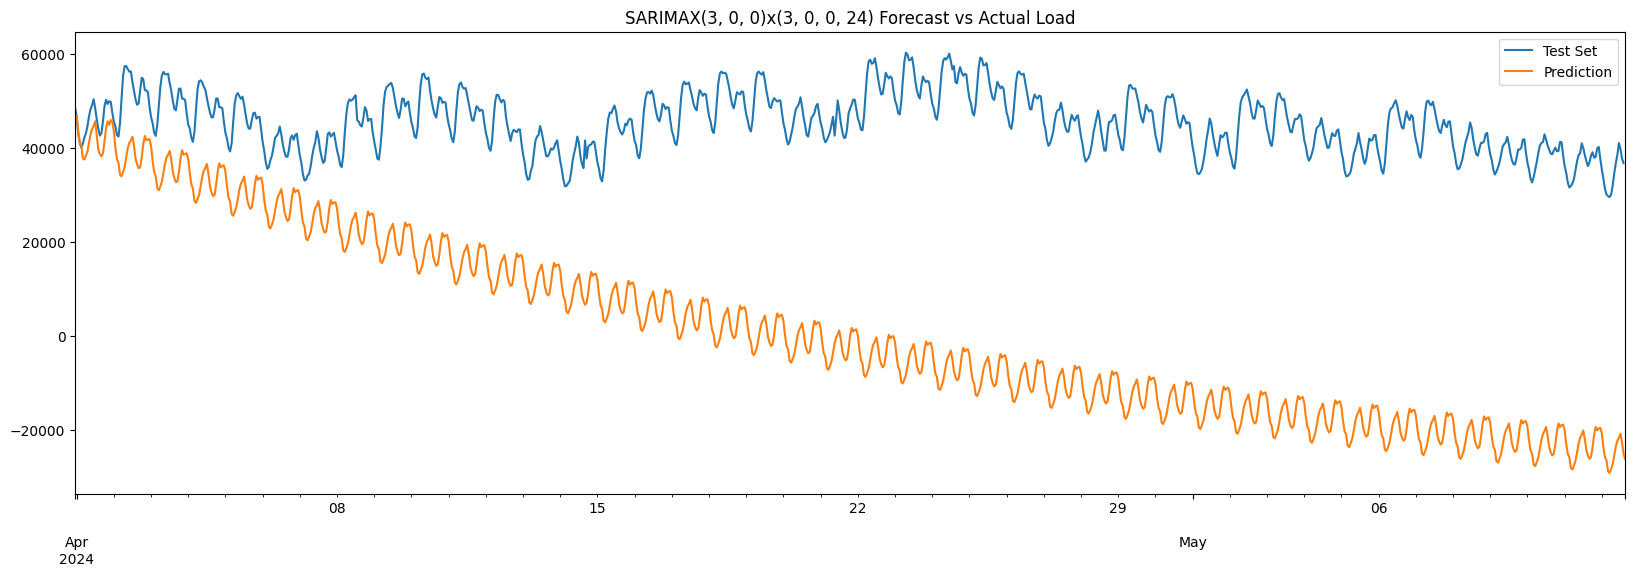

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

conv = 1e6
x_train = train.load / conv

x_train = x_train.iloc[-24*365:]  # use last year for training

order = (3,0,0)
seasonal_order = (3,0,0,24)

method = f'SARIMAX{order}x{seasonal_order}'

print(f"Fitting {method} model...")

model = SARIMAX(x_train, order=order, seasonal_order=seasonal_order)
res = model.fit()

print(res.summary())

pred = res.forecast(len(test)) * conv

plt.figure(figsize=(20,6))
test.load.plot(label='Test Set')
pred.plot(label='Prediction')
plt.title(f'{method} Forecast vs Actual Load')
plt.legend()
plt.show()

hours=1000
plt.figure(figsize=(20,6))
test.load.iloc[:hours].plot(label='Test Set')
pred.iloc[:hours].plot(label='Prediction')
plt.title(f'{method} Forecast vs Actual Load')
plt.legend()
plt.show()

# RNNs

In [33]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

INPUT_LEN = 24   # 24 heures d'historique
OUTPUT_LEN = 24   # 24 heures à prévoir
FEATURE_COLS = list(df.columns)
TARGET_COL = 'load'
STEP = 24


features = df[FEATURE_COLS].values
target = df[TARGET_COL].values

scaler_X, scaler_y = MinMaxScaler(), MinMaxScaler()
features_scaled = scaler_X.fit_transform(features)
target_scaled = scaler_y.fit_transform(target.reshape(-1, 1))

def make_sequences(X, y, input_len=INPUT_LEN, output_len=OUTPUT_LEN, step=STEP):
    X_seq, y_seq = [], []
    for i in range(input_len, len(X)-output_len+1, step):
        X_seq.append(X[i-input_len:i])
        y_seq.append(y[i:i+output_len])
    return np.array(X_seq), np.array(y_seq).reshape(-1, output_len, 1)

X, y = make_sequences(features_scaled, target_scaled)
n_train = int(len(X)*0.8)
X_train, y_train, X_test, y_test = X[:n_train], y[:n_train], X[n_train:], y[n_train:]

2025-11-07 11:19:13.496679: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-11-07 11:19:13.497067: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-11-07 11:19:13.497087: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-11-07 11:19:13.497395: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-07 11:19:13.497441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


training model...
Epoch 1/32


2025-11-07 11:19:14.433529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - loss: 0.1638 - val_loss: 0.0436
Epoch 2/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 210ms/step - loss: 0.0310 - val_loss: 0.0236
Epoch 3/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 18s 203ms/step - loss: 0.0212 - val_loss: 0.0202
Epoch 4/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 19s 213ms/step - loss: 0.0172 - val_loss: 0.0176
Epoch 5/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 220ms/step - loss: 0.0140 - val_loss: 0.0155
Epoch 6/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 20s 225ms/step - loss: 0.0113 - val_loss: 0.0125
Epoch 7/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/step - loss: 0.0091 - val_loss: 0.0102
Epoch 8/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - loss: 0.0073 - val_loss: 0.0092
Epoch 9/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 21s 238ms/step - loss: 0.0060 - val_loss: 0.0068
Epoch 10/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 247ms/step - loss: 0.0049 - val_loss: 0.0064
Epoch 11/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 12/32
90/90 ━━━━━━━━━━━━━━━━━━━━ 22s 241ms/ste

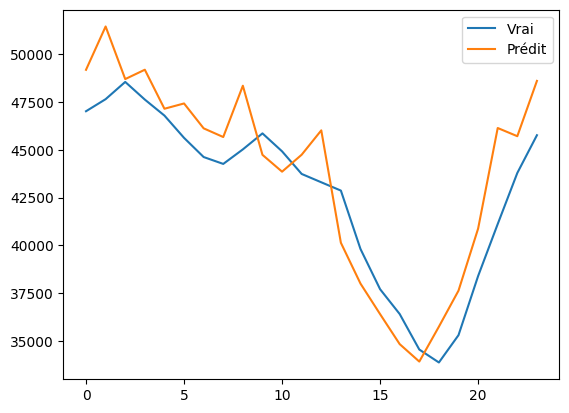

In [34]:
inputs = layers.Input(shape=(INPUT_LEN, len(FEATURE_COLS)))
x = layers.SimpleRNN(10, activation='tanh')(inputs)
# x = LSTM(50)(inputs)
# x = GRU(50)(inputs)
outputs = layers.Dense(OUTPUT_LEN)(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer='adam', loss='mse')

print("training model...")
history = model.fit(X_train, y_train, validation_split=0.1, epochs=32, batch_size=32, verbose=1)
print("model trained.")

y_pred = model.predict(X_test)
y_true = scaler_y.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1,1))

mae = mean_absolute_error(y_true, y_pred_inv)
print(f"MAE = {mae:.2f}")

plt.plot(y_true[:24], label='Vrai')
plt.plot(y_pred_inv[:24], label='Prédit')
plt.legend()
plt.show()


In [39]:
df.temp.shift(-1).ffill()

2014-12-15 10:00:00+01:00     7.94
2014-12-15 11:00:00+01:00     8.62
2014-12-15 12:00:00+01:00     9.17
2014-12-15 13:00:00+01:00     9.68
2014-12-15 14:00:00+01:00     9.79
                             ...  
2025-11-04 19:00:00+01:00    13.81
2025-11-04 20:00:00+01:00    13.33
2025-11-04 21:00:00+01:00    13.05
2025-11-04 22:00:00+01:00    12.84
2025-11-04 23:00:00+01:00    12.84
Freq: h, Name: temp, Length: 95462, dtype: float64